In [1]:
import numpy as np
from numpy import array, zeros
import pandas as pd

from scipy.fftpack import dct, idct

import cv2
import matplotlib.pyplot as plt

import os
from tqdm.notebook import tqdm

In [2]:
from BATCH_DCT_DETECT import DCT_DETECT

# Image

In [3]:
kernel = array([[0, -1, 0],
                [-1, 5,-1],
                [0, -1, 0]])

In [10]:
my_dct_detect = DCT_DETECT()

## path

In [5]:
train_data_path = "/home/re6091054/FF++/c40/train"

In [6]:
with open("ff_train_raw.txt", "r") as f:
    text = f.read()
text = [sub_text.split(" ") for sub_text in text.split("\n")][:-1]

In [7]:
Deepfakes_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*0)+(720*0):(180*1)+(720*0)]
Face2Face_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*1)+(720*1):(180*2)+(720*1)]
FaceSwap_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*2)+(720*2):(180*3)+(720*2)]
NeuralTextures_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*3)+(720*3):(180*4)+(720*3)]
Real_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(720*4):]

folder_list = [Deepfakes_folder, Face2Face_folder, FaceSwap_folder,  NeuralTextures_folder, Real_folder]

## train features

In [8]:
features_list = []

In [11]:
for folder_type in tqdm(folder_list):
    images_list = []
    for folder_path in folder_type:
        temp_image = cv2.imread(folder_path + "/0.png")
        temp_image = cv2.filter2D(src=temp_image, ddepth=-1, kernel=kernel)
        images_list.append(temp_image)
    features_list.append(my_dct_detect.main(images_list))

  0%|          | 0/5 [00:00<?, ?it/s]

In [14]:
sharp_features_arr = np.row_stack(features_list)

In [17]:
np.save("data/sharp_features_arr.npy", sharp_features_arr)

In [25]:
sharp_features_arr = np.load("data/sharp_features_arr.npy")

In [27]:
response_arr = np.load("data/response_arr.npy")

## test features

In [18]:
test_data_path = '/home/re6091054/FF++/c40/test'

In [19]:
image_types = sorted(os.listdir(test_data_path))

In [21]:
test_features_list = []

In [22]:
for img_typ in tqdm(image_types):
    type_name = test_data_path + "/" + img_typ
    folders_list = os.listdir(type_name)
    imags_list = []
    for folder in folders_list:
        folder_name = type_name + "/" + folder
        temp_iamge = cv2.imread(folder_name + "/0.png")
        temp_iamge = cv2.filter2D(src=temp_image, ddepth=-1, kernel=kernel)
        imags_list.append(temp_iamge)
    test_features_list.append(my_dct_detect.main(imags_list))

  0%|          | 0/5 [00:00<?, ?it/s]

In [23]:
test_sharp_features_arr = np.row_stack(test_features_list)

In [24]:
np.save("data/test_sharp_features_arr.npy", test_sharp_features_arr)

In [26]:
test_sharp_features_arr = np.load("data/test_sharp_features_arr.npy")

In [32]:
test_response_arr = np.load("data/test_response_arr.npy")

# Model

In [28]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [38]:
l_reg = LogisticRegression(penalty='l2', max_iter=2000)
l_reg.fit(sharp_features_arr, response_arr)

LogisticRegression(max_iter=2000)

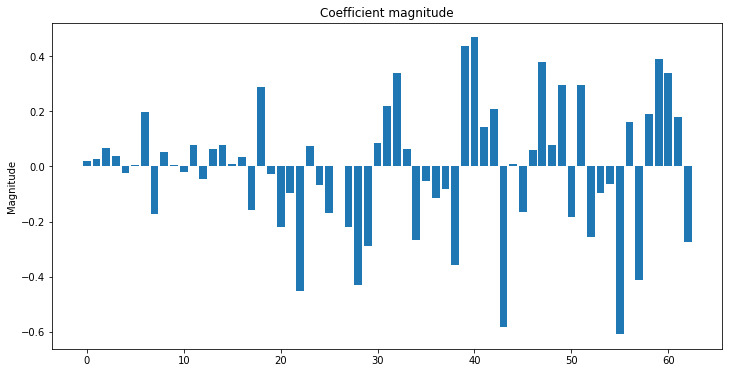

In [39]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(list(range(63)), l_reg.coef_.reshape(-1))
ax.set_ylabel("Magnitude")
ax.set_title("Coefficient magnitude")
plt.show()

In [40]:
l_reg.predict(test_sharp_features_arr)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
xg_train = xgb.DMatrix(sharp_features_arr, response_arr)

In [30]:
params = {'objective':'binary:logistic', 'eval_metric':'logloss'}
xgb_model = xgb.train(params, xg_train, verbose_eval=True) # , 30, xgb_model=None

In [31]:
fpr, tpr, thresholds = roc_curve(response_arr, xgb_model.predict(xg_train), pos_label=1)
print("Train AUC", round(auc(fpr, tpr), 4), "\n")

Train AUC 0.983 



In [33]:
xg_test = xgb.DMatrix(test_sharp_features_arr, test_response_arr)

In [34]:
test_pred_prob = xgb_model.predict(xg_test)
test_pred = np.round(test_pred_prob)

In [35]:
print("Testing ACC: ", round(accuracy_score(test_pred, test_response_arr), 4), "\n")
print("Testing confusion matrix: \n", confusion_matrix(test_pred, test_response_arr), "\n")

fpr, tpr, thresholds = roc_curve(test_response_arr, test_pred_prob, pos_label=1)
print("Testing AUC", round(auc(fpr, tpr), 4), "\n")

Testing ACC:  0.2 

Testing confusion matrix: 
 [[140 560]
 [  0   0]] 

Testing AUC 0.5 

